In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

data=pd.read_csv('hepatitis_csv.csv')
threshold=0.7
data = data[data.columns[data.isnull().mean() < threshold]]
print(data.shape)
data = data.dropna(how='all')
data.isna().sum()

(155, 20)


age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [2]:
'''Consider the hepatitis/ diabetes csv file, create the regression model display the co-efficients (B0-intercept
and B1-Slope), RMSE and predict the response. Plot the graph x v/s y in yellow and x v/s prediction in green.'''

'Consider the hepatitis/ diabetes csv file, create the regression model display the co-efficients (B0-intercept\nand B1-Slope), RMSE and predict the response. Plot the graph x v/s y in yellow and x v/s prediction in green.'

In [3]:
data['steroid'].fillna(data['steroid'].value_counts().idxmax(), inplace=True)
data['fatigue'].fillna(data['fatigue'].value_counts().idxmax(), inplace=True)
data['malaise'].fillna(data['malaise'].value_counts().idxmax(), inplace=True)
data['anorexia'].fillna(data['anorexia'].value_counts().idxmax(), inplace=True)
data['liver_big'].fillna(data['liver_big'].value_counts().idxmax(), inplace=True)
data['liver_firm'].fillna(data['liver_firm'].value_counts().idxmax(), inplace=True)
data['spleen_palpable'].fillna(data['spleen_palpable'].value_counts().idxmax(), inplace=True)
data['spiders'].fillna(data['spiders'].value_counts().idxmax(), inplace=True)
data['ascites'].fillna(data['ascites'].value_counts().idxmax(), inplace=True)
data['varices'].fillna(data['varices'].value_counts().idxmax(), inplace=True)
data['bilirubin'].fillna(data['bilirubin'].value_counts().idxmax(), inplace=True)
data['alk_phosphate'].fillna(data['alk_phosphate'].value_counts().idxmax(), inplace=True)
data['sgot'].fillna(data['sgot'].value_counts().idxmax(), inplace=True)
data['albumin'].fillna(data['albumin'].value_counts().idxmax(), inplace=True)
data['protime'].fillna(data['protime'].value_counts().idxmax(), inplace=True)

data.isna().sum()


age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

In [4]:
X=data.iloc[:,0]
y=data.iloc[:,-4]
x=np.array(X).reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size = 0.3, random_state = 10 )  
print('X-TRAIN')
print(X_train)
print('x-test')
print(X_test)
print('y-train')
print(Y_train)
print('y-test')
print(Y_test)


X-TRAIN
[[38]
 [41]
 [34]
 [44]
 [32]
 [60]
 [27]
 [40]
 [41]
 [72]
 [45]
 [30]
 [39]
 [47]
 [36]
 [39]
 [22]
 [51]
 [51]
 [31]
 [20]
 [25]
 [31]
 [20]
 [45]
 [28]
 [30]
 [58]
 [33]
 [56]
 [25]
 [36]
 [22]
 [36]
 [51]
 [52]
 [49]
 [35]
 [35]
 [48]
 [39]
 [24]
 [51]
 [34]
 [34]
 [34]
 [27]
 [62]
 [38]
 [ 7]
 [32]
 [23]
 [37]
 [40]
 [42]
 [54]
 [34]
 [23]
 [50]
 [61]
 [43]
 [47]
 [50]
 [61]
 [32]
 [59]
 [42]
 [31]
 [31]
 [52]
 [38]
 [58]
 [23]
 [30]
 [62]
 [27]
 [41]
 [38]
 [57]
 [39]
 [44]
 [33]
 [28]
 [30]
 [34]
 [36]
 [54]
 [26]
 [32]
 [42]
 [45]
 [38]
 [30]
 [45]
 [48]
 [66]
 [69]
 [52]
 [30]
 [36]
 [39]
 [46]
 [37]
 [45]
 [49]
 [38]
 [34]
 [30]]
x-test
[[36]
 [39]
 [50]
 [57]
 [37]
 [54]
 [47]
 [51]
 [37]
 [56]
 [37]
 [30]
 [28]
 [70]
 [38]
 [64]
 [50]
 [36]
 [42]
 [65]
 [25]
 [50]
 [27]
 [42]
 [28]
 [54]
 [40]
 [67]
 [61]
 [54]
 [56]
 [78]
 [33]
 [47]
 [24]
 [38]
 [20]
 [44]
 [51]
 [50]
 [28]
 [53]
 [34]
 [49]
 [44]
 [44]
 [23]]
y-train
49     4.2
32     5.0
56     4.0
97     3.5
6

In [5]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
y_pred= regressor.predict(X_test)
r_sq=regressor.score(x,y)
print(f"Coefficient of determination={r_sq}")
print(f"intercept: {regressor.intercept_}")
print(f"slope: {regressor.coef_}")
print(f"predicted response:\n{y_pred}")
print(f"Mean square error: {mean_squared_error( Y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score( Y_test, y_pred )}")

Coefficient of determination=0.05598555395220661
intercept: 4.283377173842285
slope: [-0.01077355]
predicted response:
[3.89552923 3.86320857 3.74469948 3.6692846  3.88475568 3.70160526
 3.77702014 3.73392592 3.88475568 3.68005815 3.88475568 3.96017056
 3.98171766 3.5292284  3.87398212 3.59386972 3.74469948 3.89552923
 3.83088791 3.58309617 4.01403833 3.74469948 3.99249122 3.83088791
 3.98171766 3.70160526 3.85243502 3.56154906 3.62619038 3.70160526
 3.68005815 3.44303997 3.92784989 3.77702014 4.02481188 3.87398212
 4.0679061  3.8093408  3.73392592 3.74469948 3.98171766 3.71237882
 3.91707634 3.75547303 3.8093408  3.8093408  4.03558543]
Mean square error: 0.3997152909038894
Coefficient of determination: 0.06942047383469108


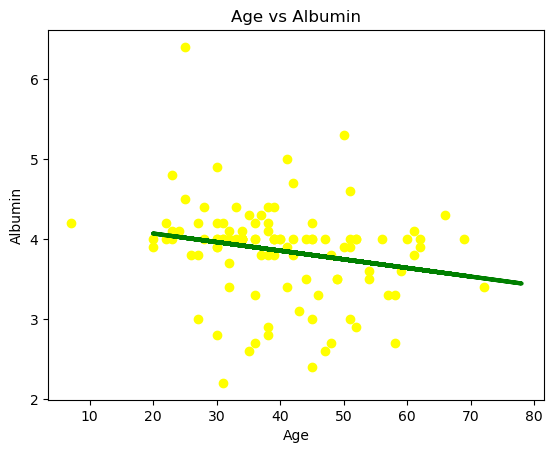

In [6]:
plt.scatter(X_train, Y_train, color='yellow',marker='o') # plotting the observation line
 
plt.plot(X_test, regressor.predict(X_test), color='green',linewidth=3) # plotting the regression line
 
plt.title("Age vs Albumin") # stating the title of the graph
 
plt.xlabel("Age") # adding the name of x-axis
plt.ylabel("Albumin") # adding the name of y-axis
plt.show()

In [7]:
a=[30,40,50]
a=np.array(a).reshape(-1,1)
pred=regressor.predict(a)
print(pred)

[3.96017056 3.85243502 3.74469948]


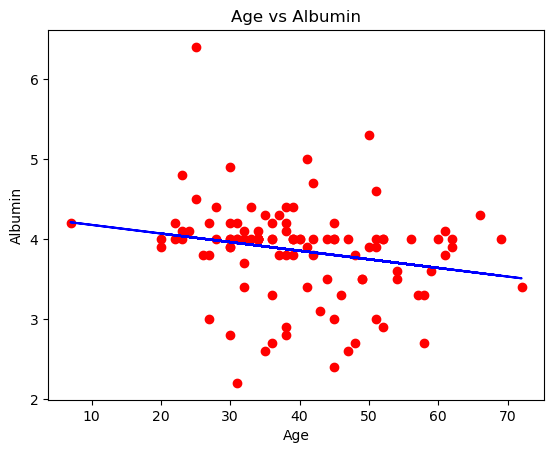

In [8]:
#plot for the TRAIN
  
plt.scatter(X_train, Y_train, color='red') # plotting the observation line
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
plt.title("Age vs Albumin") # stating the title of the graph
 
plt.xlabel("Age") # adding the name of x-axis
plt.ylabel("Albumin") # adding the name of y-axis
plt.show()

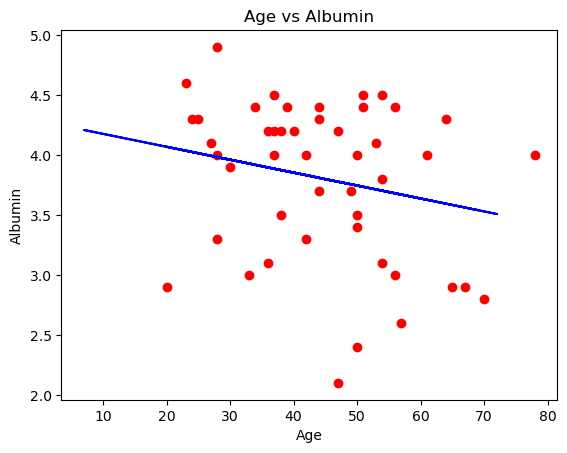

In [9]:
#plot for the TEST
  
plt.scatter(X_test, Y_test, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title("Age vs Albumin") # stating the title of the graph
 
plt.xlabel("Age") # adding the name of x-axis
plt.ylabel("Albumin") # adding the name of y-axis
plt.show()